[21. 21. 21. ... 47. 47. 45.]
 5
len(sensor)%N= 0


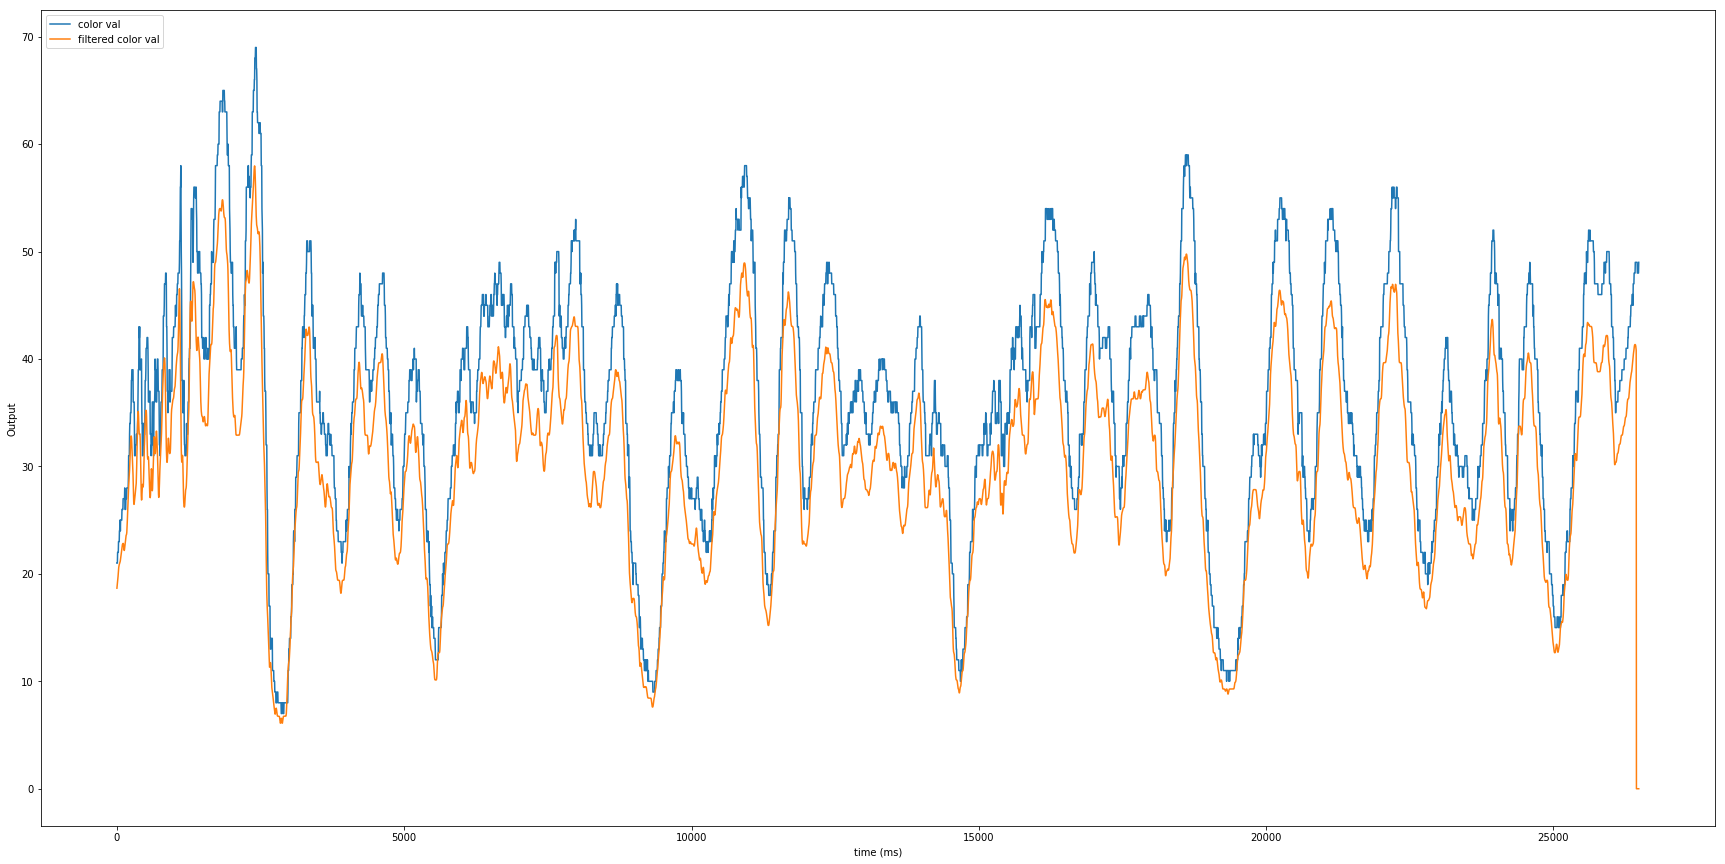

In [38]:
# パッケージインストールと変数宣言とフィルタリング
import numpy as np
import matplotlib.pyplot as plt

N = 11
hw = [0,0.00785,0.04015,0.10325,0.17066,0.20,0.17066,0.10325,0.04015,0.00785,0]

file = open("forward2.txt")
file_lines = file.readlines()
sensor = np.array([float(line.replace("\n", "").split(",")[0]) for line in file_lines])
print(sensor)

# データの個数をNの倍数にするために、最後のm個のデータを削除するプロセス
m = len(sensor) % N
print('', m)
for i in range(0, m, 1):
    sensor = np.delete(sensor, len(sensor)-1)
    
print('len(sensor)%N=', len(sensor)%N)

filtered_val = [0] * len(sensor)

for i in range(N, len(sensor), 1):
    for j in range(0, N, 1):
#         print('i=', i, ' j=', j, 'i-(N-j)=', i-(N-j), 'i-N=', i-N)
        # 生データにフィルタ係数をかける
        filtered_val[i-N] += sensor[i-(N-j)] * hw[j]
        
# 生データとフィルタ後のデータをプロット
t = range(0, len(sensor)*4, 4)
plt.figure(figsize=(30, 15))
plt.plot(t, sensor, label='color val')              # 元のカラーデータ
plt.plot(t, filtered_val, label='filtered color val')       # フィルタリング結果1
plt.xlabel("time (ms)")
plt.ylabel("Output")
plt.legend(loc = 'upper left')
plt.show()

min color val= 7.0 max color val= 69.0
min filtered val= 0.0 max filtered val= 57.97633
min(norm_val)= 0.0 max(norm_val)= 48.28502542372881


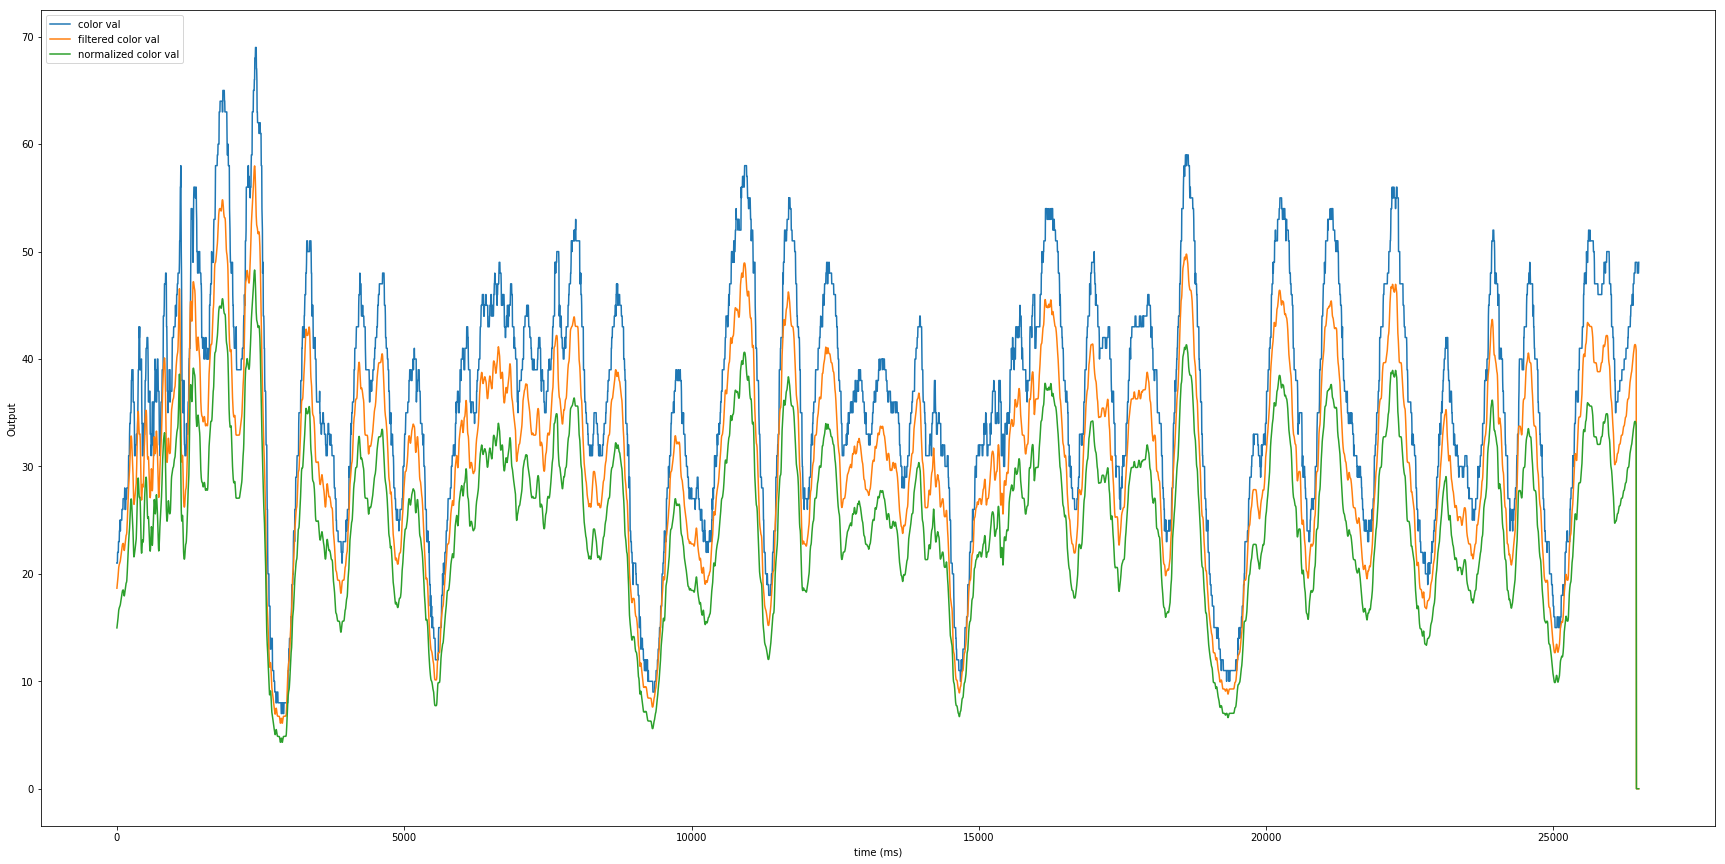

In [57]:
# 正規化
print('min color val=', np.min(sensor), 'max color val=', np.max(sensor))
print('min filtered val=', np.min(filtered_val), 'max filtered val=', np.max(filtered_val))

x_min = 1      # センサデータの最小値
x_max = 60     # センサデータの最大値
val_min = 0    # 正規化後の最小値
val_max = 50   # 正規化後の最大値

norm_val = [0] * len(sensor)

# 正規化
for i in range(0, len(sensor), 1):
    if filtered_val[i] > x_max:
        a = x_max
    elif filtered_val[i] < x_min:
        a = x_min
    else:
        a = filtered_val[i]
 
    norm_val[i] = (((a - x_min) / (x_max - x_min)) * (val_max - val_min)) + val_min
    
print('min(norm_val)=', np.min(norm_val), 'max(norm_val)=', np.max(norm_val))

# 生データとフィルタ後のデータと正規化後のデータをプロット
t = range(0, len(sensor)*4, 4)
plt.figure(figsize=(30, 15))
plt.plot(t, sensor, label='color val')
plt.plot(t, filtered_val, label='filtered color val')
plt.plot(t, norm_val, label='normalized color val')
plt.xlabel("time (ms)")
plt.ylabel("Output")
plt.legend(loc = 'upper left')
plt.show()

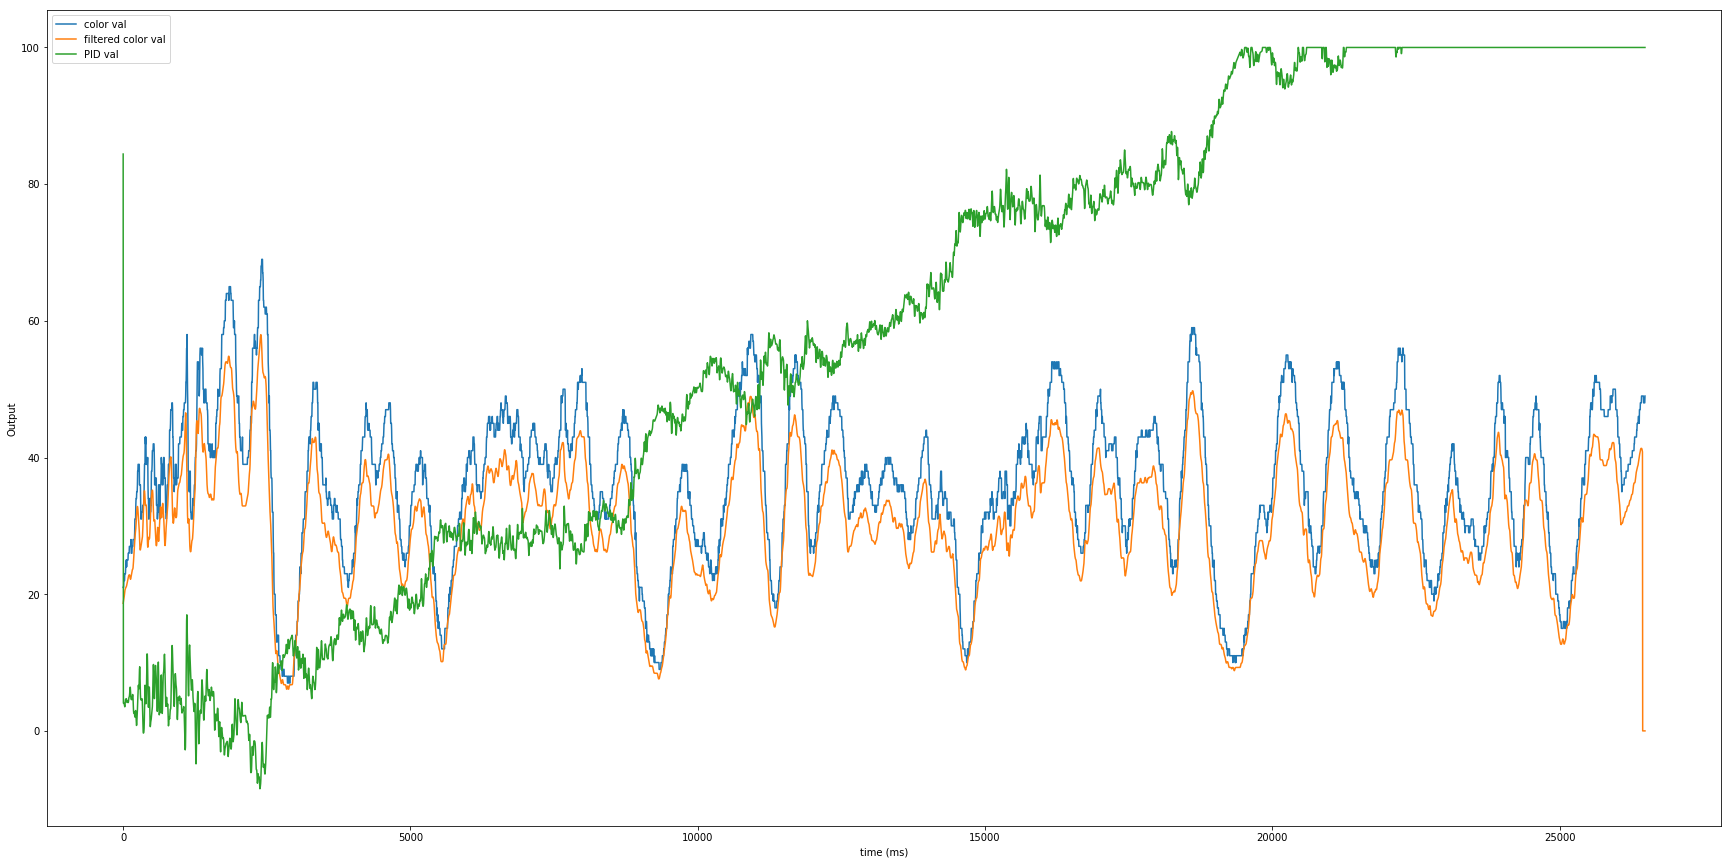

30.416846726064634


In [58]:
# PID制御
DESIRED_VALUE = 30

KU = 0.65
PU = 0.6
TI = 0.5*PU
TD = 0.125*PU
A = 0.85

KP = 0.60*KU*A
KI = KP/TI*A
KD = KP*TD*A
DELTA_T = 0.0040

e = 0.0
P = [0.0] * len(sensor)
I = [0.0] * len(sensor)
D = [0.0] * len(sensor)

integral = 0
differential = 0
e_last = 0

PID_val = [0] * len(sensor)

for i in range(0, len(sensor), 1):
    # 偏差eを更新
    e_last = e
    # 偏差e ＝（目標値）ー（現在時間ｔの取得値）
    e = DESIRED_VALUE - norm_val[i]
#     e = DESIRED_VALUE - filtered_val[i]
    # 積分値
    integral += (e + e_last) / 2.0 * DELTA_T
    # 微分値
    differential = (e - e_last) / DELTA_T

    P[i] = KP * e
    I[i] = KI * integral
    D[i] = KD * differential
    PID_val[i] = P[i] + I[i] + D[i]
    
    if PID_val[i] > 100:
        PID_val[i] = 100
    elif PID_val[i] < -100:
        PID_val[i] = -100
    
# 生データとフィルタ後のデータと正規化後のデータをプロット
t = range(0, len(sensor)*4, 4)
plt.figure(figsize=(30, 15))
# plt.plot(t, P, label='P val')
# plt.plot(t, I, label='I val')
# plt.plot(t, D, label='D val')

plt.plot(t, sensor, label='color val')
plt.plot(t, filtered_val, label='filtered color val')

plt.plot(t, PID_val, label='PID val')
plt.xlabel("time (ms)")
plt.ylabel("Output")
plt.legend(loc = 'upper left')
plt.show()

print(np.average(filtered_val))